In [ ]:
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 53.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 58.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.5 MB/s eta 0:00:0

In [25]:
import tensorflow as tf
import keras

In [26]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [ ]:
Q2. Load the Wine Quality dataset and explore its dimensions.

In [36]:
import pandas as pd
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [37]:
print("Wine Quality dataset shape:", wine.shape)

Wine Quality dataset shape: (1599, 12)


In [ ]:
Q3. Check for null values, identify categorical variables, and encode them.

In [38]:
print("Null values in the dataset:", wine.isnull().sum().sum())

Null values in the dataset: 0


In [33]:
# There are no null values in the dataset
# The only categorical variable is quality, which is the target variable
# We can encode it using one-hot encoding, where quality = 3, 4, 5, 6, 7, 8 are encoded as 
#[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1] respectively

In [40]:
wine["quality"] = wine["quality"].apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
Q4. Separate the features and target variables from the dataset.

In [42]:
X = wine.drop("quality", axis=1) # Features
y = wine["quality"] # Target

In [ ]:
Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Test set is 20% of the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 
# Validation set is 25% of the training data

In [ ]:
Q6. Scale the dataset using an appropriate scaling technique.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [45]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(11,))) # First hidden layer with 16 neurons and ReLU activation function
model.add(Dense(8, activation="relu")) # Second hidden layer with 8 neurons and ReLU activation function
model.add(Dense(1, activation="sigmoid")) # Output layer with 1 neuron and sigmoid activation function for binary classification

In [ ]:
Q9. Print the summary of the model architecture.

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [47]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [48]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 8ms/step - loss: 0.7615 - accuracy: 0.3191 - val_loss: 0.6956 - val_accuracy: 0.5031
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6684 - val_loss: 0.6103 - val_accuracy: 0.7844
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.8248 - val_loss: 0.5373 - val_accuracy: 0.8687
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.8582 - val_loss: 0.4630 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8634 - val_loss: 0.3939 - val_accuracy: 0.8906
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8634 - val_loss: 0.3404 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8770 - val_loss: 0.3034 - val_accuracy: 0.8938
Epoch 8/20
30/30 [==

In [ ]:
Q13. Obtain the model's parameters (weights and biases).

In [49]:
weights = model.get_weights()

In [50]:
print("Weights:", weights)

Weights: [array([[-0.26886111, -0.03553678, -0.47862336, -0.18327089, -0.00186051,
         0.5418165 ,  0.4835588 , -0.14981596,  0.14466414,  0.33026388,
         0.13954452, -0.15986608,  0.35199365, -0.02367416, -0.12791525,
         0.17683119],
       [ 0.2254182 , -0.27228433,  0.55559856,  0.04321806,  0.18729657,
        -0.10103875,  0.08857092,  0.5416946 , -0.47202206, -0.378358  ,
         0.50118273, -0.12502442, -0.04004538,  0.04003499, -0.17577542,
        -0.15051107],
       [ 0.30083004,  0.30331644,  0.2941023 ,  0.03186452,  0.30429438,
         0.19201297,  0.27977067,  0.36568716, -0.08375937,  0.08386137,
        -0.56588113,  0.29693234,  0.02293366,  0.24951571,  0.38987204,
        -0.5964634 ],
       [ 0.11798709, -0.5021656 , -0.3432067 ,  0.32429734, -0.42428166,
         0.37102032,  0.2908727 ,  0.13188672, -0.27073017, -0.46070272,
        -0.23794644,  0.22924134, -0.2945526 , -0.16310923, -0.24177171,
        -0.23330985],
       [ 0.08449537, -0.20

In [ ]:
Q14. Store the model's training history as a Pandas DataFrame.

In [51]:
history_df = pd.DataFrame(history.history)

In [52]:
print("Training history:", history_df)

Training history:         loss  accuracy  val_loss  val_accuracy
0   0.761509  0.319082  0.695629      0.503125
1   0.653025  0.668405  0.610346      0.784375
2   0.585419  0.824818  0.537282      0.868750
3   0.520817  0.858186  0.463003      0.884375
4   0.454471  0.863399  0.393913      0.890625
5   0.396477  0.863399  0.340427      0.890625
6   0.353662  0.876955  0.303424      0.893750
7   0.325187  0.879041  0.283329      0.884375
8   0.307506  0.883212  0.271674      0.881250
9   0.297333  0.888425  0.265286      0.884375
10  0.290903  0.886340  0.262031      0.887500
11  0.286251  0.887383  0.260504      0.890625
12  0.283347  0.885297  0.259619      0.884375
13  0.279808  0.887383  0.258135      0.890625
14  0.278383  0.889468  0.257506      0.884375
15  0.275570  0.886340  0.257494      0.884375
16  0.273735  0.890511  0.257630      0.884375
17  0.271848  0.890511  0.257543      0.881250
18  0.269879  0.890511  0.257303      0.884375
19  0.268605  0.892596  0.257792      0.88

In [ ]:
Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

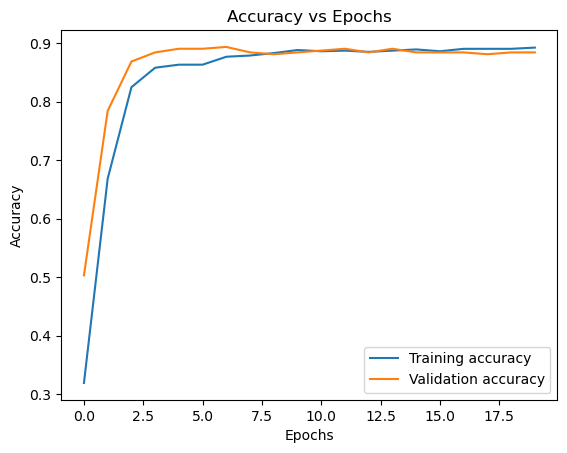

In [53]:
import matplotlib.pyplot as plt
plt.plot(history_df["accuracy"], label="Training accuracy")
plt.plot(history_df["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

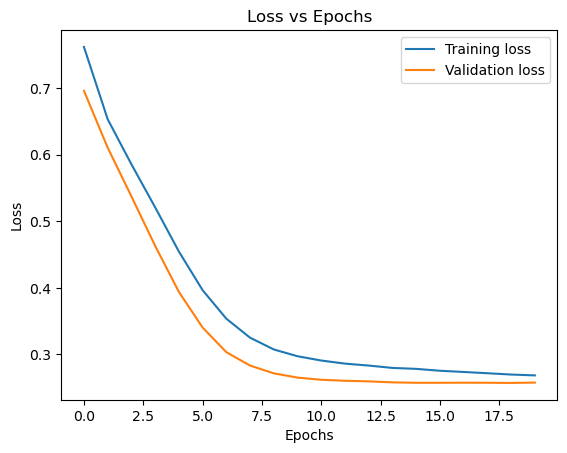

In [54]:
plt.plot(history_df["loss"], label="Training loss")
plt.plot(history_df["val_loss"], label="Validation loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.8656


In [56]:
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.27190932631492615
Test accuracy: 0.8656250238418579
